In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn import metrics
import seaborn as sns
import pickle


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
imdb_data=pd.read_csv('IMDB Dataset.csv')
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [3]:
imdb_data.isnull().sum()


review       0
sentiment    0
dtype: int64

In [4]:
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
imdb_data['sentiment'].unique()


array(['positive', 'negative'], dtype=object)

In [6]:
imdb_data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

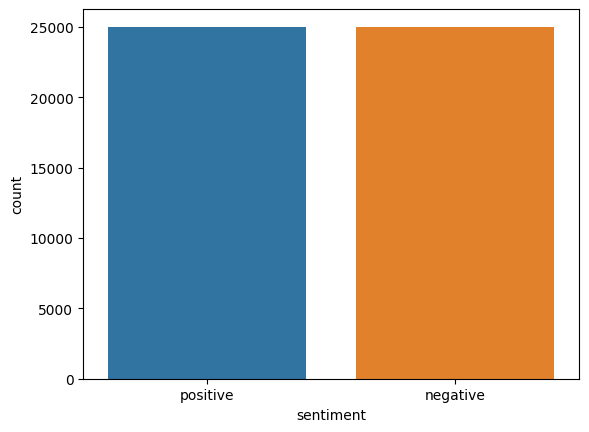

In [7]:
sns.countplot(x='sentiment',data = imdb_data)
plt.show()

In [8]:
label = LabelEncoder()
imdb_data['sentiment'] = label.fit_transform(imdb_data['sentiment'])

In [9]:
imdb_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [10]:
X = imdb_data['review']
y = imdb_data['sentiment']

In [11]:
ps = PorterStemmer()
corpus = []
for i in range(len(X)):
    print(i)
    review = re.sub("[^a-zA-Z]"," ", X[i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in set(stopwords.words("english"))]
    review = " ".join(review)
    corpus.append(review)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [12]:
corpus

['one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch d

In [13]:
import matplotlib.pyplot as plt  
from wordcloud import WordCloud, STOPWORDS  

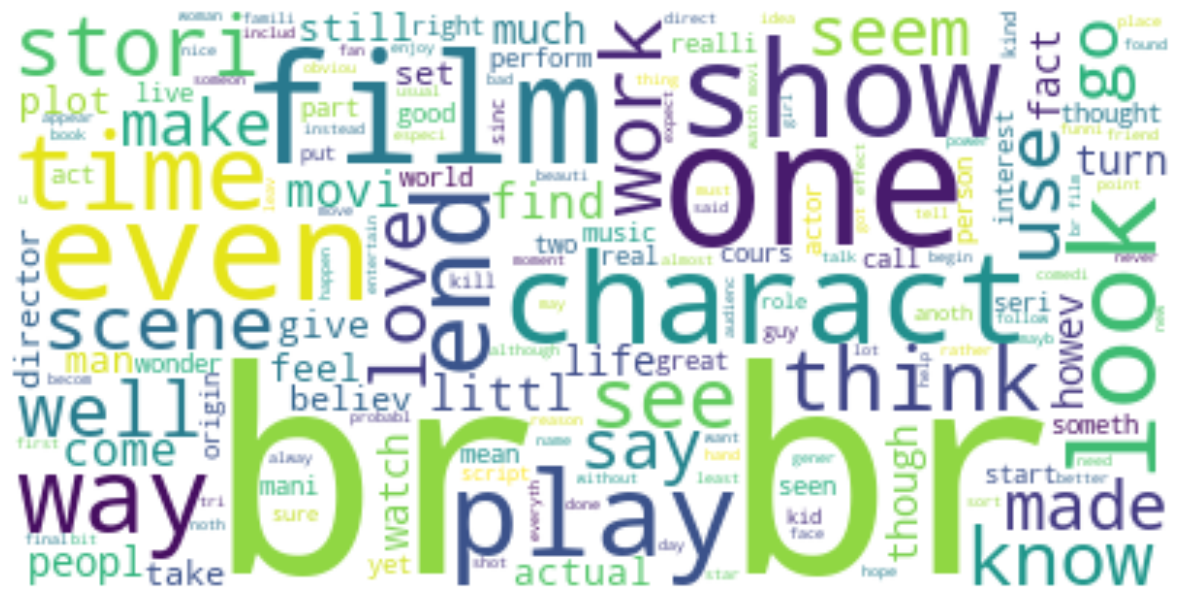

In [14]:
text = " ".join(i for i in corpus)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray()

In [16]:
X.shape

(50000, 5000)

In [17]:
norm_train_reviews=imdb_data.review[:40000]
norm_train_reviews[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [18]:
norm_test_reviews=imdb_data.review[40000:]
norm_test_reviews[45005]

"I read all the reviews here AFTER watching this piece of cinematic garbage and it took me at least 2 pages to find out that somebody else didn't think that this appallingly unfunny montage WASN'T the acme of humour in the 70s or indeed in any other era! If this isn't the least funny set of sketch *comedy* I've ever seen it'll do till it comes along. Half of the skits had already been done (and infinitely better) by acts such as Monty Python and Woody Allen... If I was to say that a nice piece of animation that lasts about 90 seconds is the highlight of this film it would still not get close to summing up just how mindless and drivel-ridden this waste of 75 minutes is. Seminal comedy? Only in the world where seminal really DOES mean semen. Scatological humour? Only in a world where scat IS actually feces. Precursor jokes? Only if by that we mean that this is a handbook of how NOT to do comedy. Tits and bums and the odd beaver. Nice...if you are a pubescent boy with at least one hand fr

In [19]:
X_train , X_test , Y_train , Y_test = train_test_split(X , y , test_size=0.2 , random_state=101)


In [20]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((40000, 5000), (10000, 5000), (40000,), (10000,))

In [21]:
mnb = MultinomialNB()
mnb.fit(X_train , Y_train)

MultinomialNB()

In [22]:
pred = mnb.predict(X_test)

In [23]:
print(accuracy_score(Y_test , pred)*100)
print(confusion_matrix(Y_test , pred))
print(classification_report(Y_test , pred))

85.18
[[4215  744]
 [ 738 4303]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4959
           1       0.85      0.85      0.85      5041

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [24]:
pd.DataFrame(np.c_[Y_test , pred] , columns=["Actual" , "Predicted"])

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
9995,1,1
9996,0,0
9997,0,0
9998,1,1


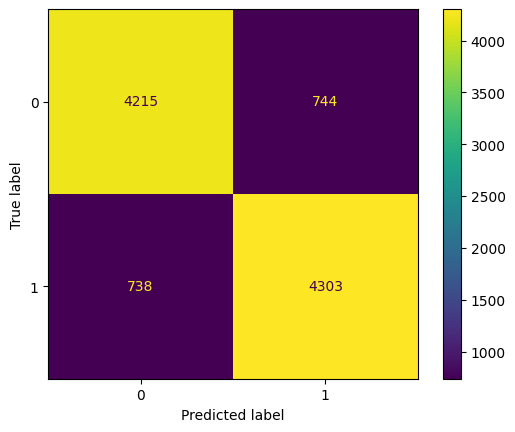

In [25]:
confusion_matrix = metrics.confusion_matrix(Y_test, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [26]:
pickle.dump(cv,open("tfid-vectorizer.pkl", "wb"))
pickle.dump(mnb,open("review-classification.pkl", "wb"))

In [27]:
save_cv = pickle.load(open("tfid-vectorizer.pkl", "rb"))
model = pickle.load(open("review-classification.pkl", "rb"))

In [28]:
def test_model(sentence):
    sen = save_cv.transform([sentence]).toarray()
    res = model.predict(sen)[0]
    if res == 1:
        return 'Positive review'
    else:
        return 'Negative review'

In [29]:
sen = 'This is a wonderful movie of my life'
res = test_model(sen)
print(res)

Positive review


In [30]:
sen = 'This is the beautiful movie, I have ever seen in my life'
res = test_model(sen)
print(res)

Positive review


In [31]:
sen = 'This is the worst movie, I have ever seen in my life'
res = test_model(sen)
print(res)

Negative review


In [32]:
sen = 'this movie is a disaster'
res = test_model(sen)
print(res)

Negative review


In [33]:
sen = 'character build up is awesome'
res = test_model(sen)
print(res)

Positive review
